# Logistic模型

logit函数：

 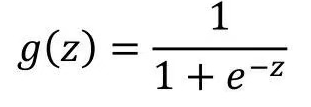

## 模型构建

LogisticRegression(penalty='l2',dual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,class_weight=None,random_state=None,

solver='liblinear',max_iter=100,multi_class='ovr',verbose=0,warm_start=Flase,n_jobs=1)

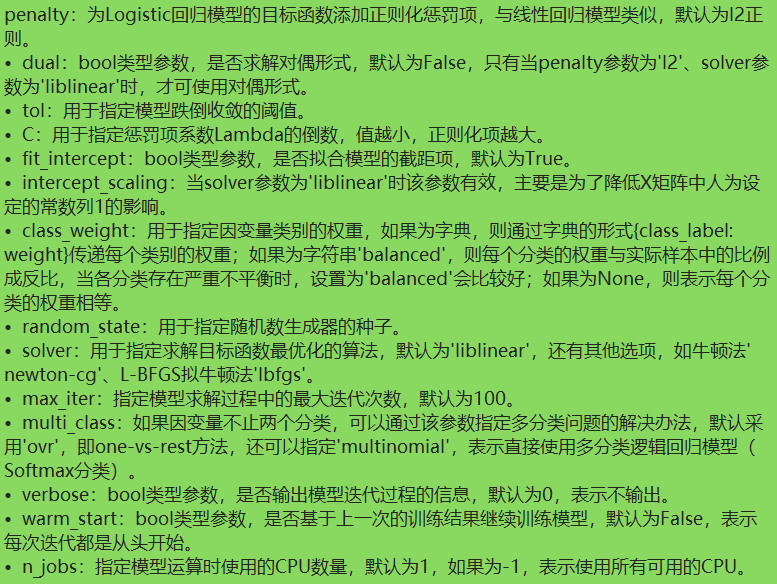

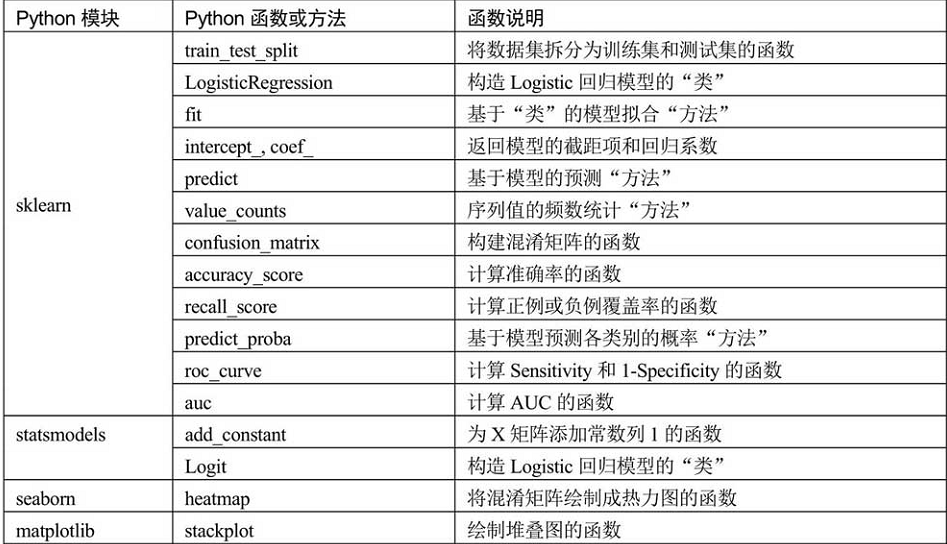

In [1]:
#导入第三方模块
import pandas as pd
import numpy as np
from sklearn import linear_model

In [2]:
#读取数据
sports = pd.read_csv('Run or Walk.csv')

In [3]:
sports.head(3)

,date,time,username,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017/6/30,13:51:15:847724020,viktor,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017/6/30,13:51:16:246945023,viktor,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017/6/30,13:51:16:446233987,viktor,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367


In [4]:
#提取出所有自变量名称
predictors = sports.columns[4:]
predictors

Index(['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x',
       'gyro_y', 'gyro_z'],
      dtype='object')

In [5]:
#构建自变量矩阵
X = sports.loc[:,predictors]
X

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...
88583,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [6]:
#提取y变量值
y = sports.activity
y

0        0
1        0
2        0
3        0
4        0
        ..
88583    0
88584    0
88585    0
88586    0
88587    0
Name: activity, Length: 88588, dtype: int64

In [7]:
#蒋数据集拆分为训练集和测试集
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.25,random_state=1234)

In [8]:
#利用训练集建模
sklearn_logistic = linear_model.LogisticRegression()
sklearn_logistic.fit(X_train,y_train)

LogisticRegression()

In [9]:
#返回模型的各个参数
print(sklearn_logistic.intercept_,sklearn_logistic.coef_)

[4.36637441] [[ 0.48695898  6.87517973 -2.44872468 -0.01385936 -0.16085022  0.13389695]]


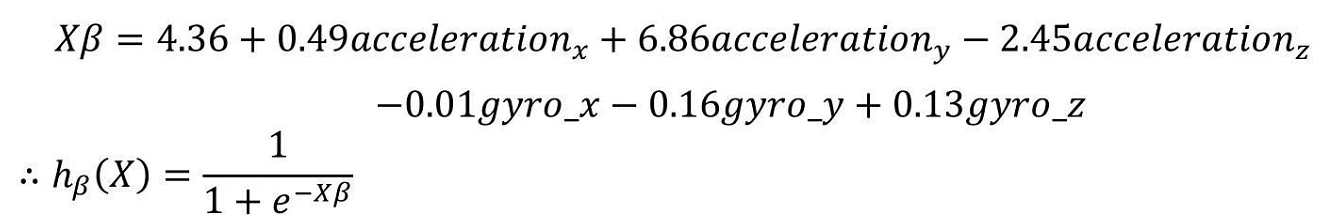

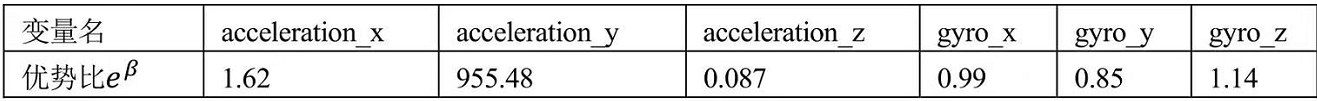

解释：在其他因素不变的情况下，x轴方向的加速度每增加一个单位，会使跑步发生比变化1.62倍

## 模型预测

In [10]:
sklearn_predict = sklearn_logistic.predict(X_test)

In [11]:
#预测结果统计
pd.Series(sklearn_predict).value_counts()

0    12119
1    10028
dtype: int64

## 模型评估

In [12]:
#导入第三方模块
from sklearn import metrics
#混淆矩阵
cm = metrics.confusion_matrix(y_test,sklearn_predict,labels=[0,1])
cm

array([[9969, 1122],
       [2150, 8906]], dtype=int64)

基于该举证计算模型预测的准确率Accuracy，正例覆盖率Sensitivity，负例覆盖率Specificity

In [16]:
Accuracy = metrics.accuracy_score(y_test,sklearn_predict)
Sensitivity = metrics.recall_score(y_test,sklearn_predict)
Specificity = metrics.recall_score(y_test,sklearn_predict,pos_label=0)
print('模型准确率为:%.2f%%'%(Accuracy*100))
print('正例覆盖率为:%.2f%%'%(Sensitivity*100))
print('负例覆盖率为:%.2f%%'%(Specificity*100))

模型准确率为:85.23%
正例覆盖率为:80.55%
负例覆盖率为:89.88%


对混淆矩阵做可视化展现，使用seaborn中的heatmap函数

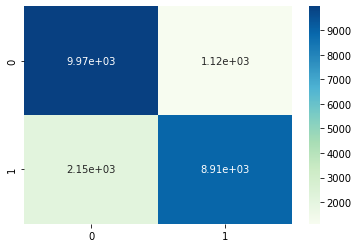

In [18]:
#导入第三方模块
import seaborn as sns
import matplotlib.pyplot as plt

#绘制热力图
sns.heatmap(cm,annot = True,fmt='.2e',cmap='GnBu')

#图形显示
plt.show()

颜色越深代表样本量越多，图中主对角线颜色比其他地方深，说明正确预测正例和负例的样本数目都很大。

再绘制最常见的ROC曲线，然后将对应的AUC值体现在图中

In [19]:
#导入第三方模块
import matplotlib.pyplot as plt
#y得分为模型预测正例的概率
y_score = sklearn_logistic.predict_proba(X_test)[:,1]
#计算不同阈值下，fpr和tpr的组合之，其中fpr表示1-Specificity，tpr表示Sensitivity
fpr,tpr,threshold = metrics.roc_curve(y_test,y_score)
#计算AUC的值
roc_auc = metrics.auc(fpr,tpr)

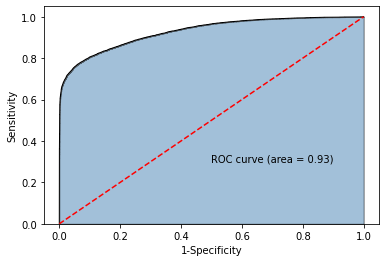

In [20]:
#绘制面积图
plt.stackplot(fpr,tpr,color='steelblue',alpha=0.5,edgecolor='black')

#添加ROC曲线的轮廓
plt.plot(fpr,tpr,color='black',lw=1)

#添加对角线
plt.plot([0,1],[0,1],color = 'red',linestyle = '--')

#添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.2f)'%roc_auc)

#添加x轴和y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.show()